# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {"family": "times new roman", "color": "darkred",
              "weight": "bold", "size": 14}
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100

#### Load Dataset

In [103]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [17]:
df.shape

(200, 5)

In [104]:
df = df.rename(columns={"Annual Income (k$)": "income", "Spending Score (1-100)":"Score"})

In [105]:
df.head()

,CustomerID,Gender,Age,income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





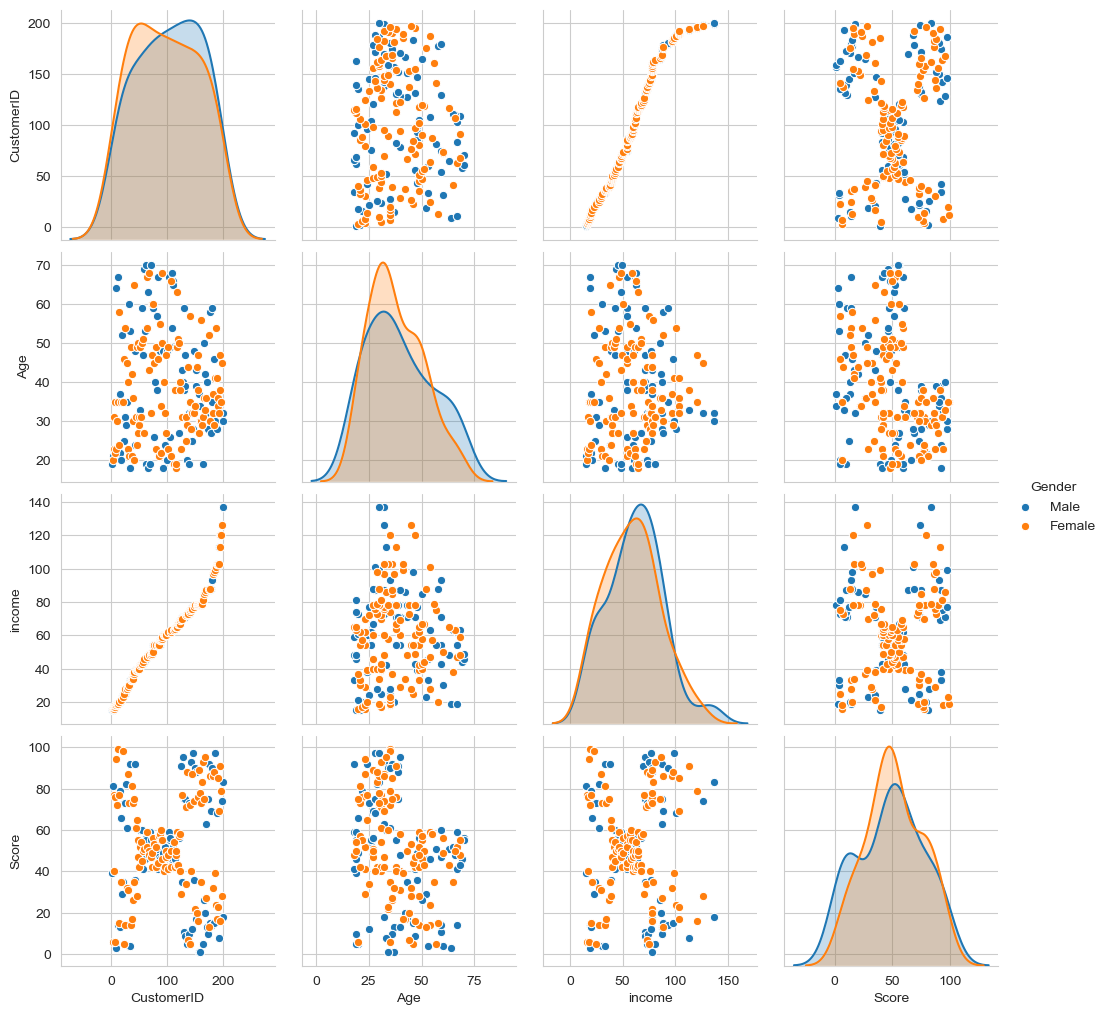

In [22]:
sns.pairplot(df, hue="Gender")

In [24]:
df.describe()

,CustomerID,Age,income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [81]:
from pyclustertend import hopkins

In [84]:
hopkins(pd.get_dummies(df), df.shape[0])

0.1649832363924468

In [85]:
from sklearn.preprocessing import scale

In [86]:
hopkins(scale(pd.get_dummies(df)), df.shape[0])

0.17737803031596064

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'income', 'Score'], dtype='object')

In [30]:
df1 = df[["Age", "Score"]]
df1.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [32]:
from sklearn.cluster import KMeans

In [34]:
model1 = KMeans(n_clusters=2).fit(df1)

In [36]:
model1.inertia_

75949.15601023017

In [38]:
labels = model1.labels_

In [51]:
centers = model1.cluster_centers_

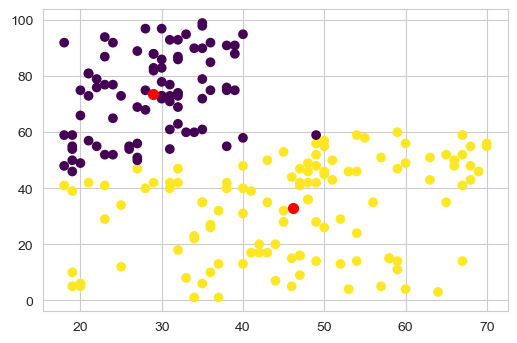

In [59]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1], c=labels, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="red", s=50)

#### *ii. Determine optimal number of clusters*

In [61]:
error = []
K =range(1,10)
for k in K:
    model = KMeans(n_clusters=k).fit(df1)
    error.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

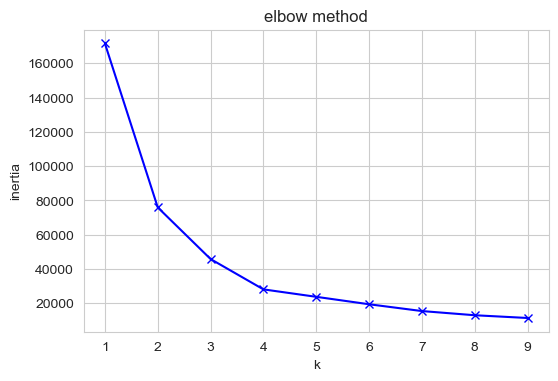

In [72]:
plt.plot(K, error, "bx-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("elbow method")

#### *iii. Apply K Means*

In [74]:
model = KMeans(n_clusters=4).fit(df1)

In [76]:
centers = model.cluster_centers_

In [78]:
labels = model.labels_

In [77]:
model.inertia_

28165.58356662934

#### *iv. Visualizing and Labeling All the Clusters*

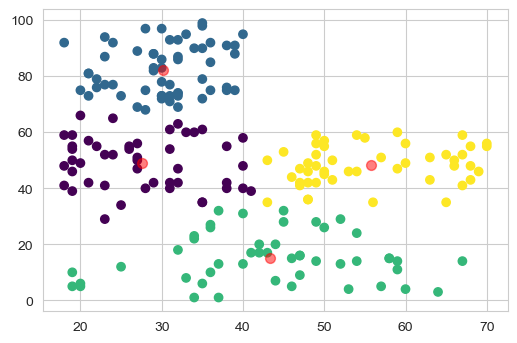

In [80]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1], c=labels, cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="red", s=50, alpha=0.5)

In [87]:
df1["clusters"] = labels

In [89]:
df1.sample(5)

,Age,Score,clusters
125,31,77,1
6,35,6,2
191,32,69,1
149,34,90,1
92,48,49,3


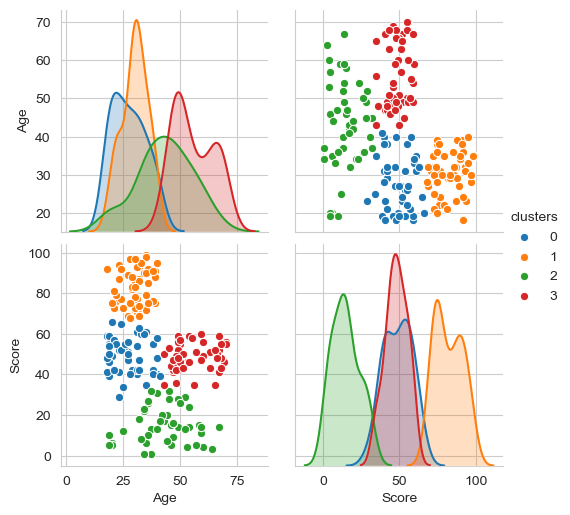

In [90]:
sns.pairplot(df1, hue="clusters")

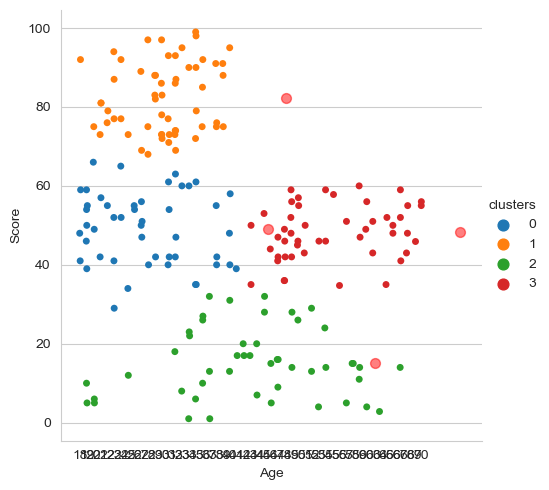

In [97]:
sns.catplot("Age", "Score", hue="clusters", data=df1)
plt.scatter(centers[:,0], centers[:,1], c="red", s=50, alpha=0.5)

In [98]:
from sklearn.metrics import silhouette_score

In [99]:
silhouette_score(df1, labels)

0.5014655901371473

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [133]:
df3 = df.drop("CustomerID", axis=1)
df3 = pd.get_dummies(df3 ,drop_first=True)

df3.head()

,Age,income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [134]:
hc_complete = linkage(df3, "complete")

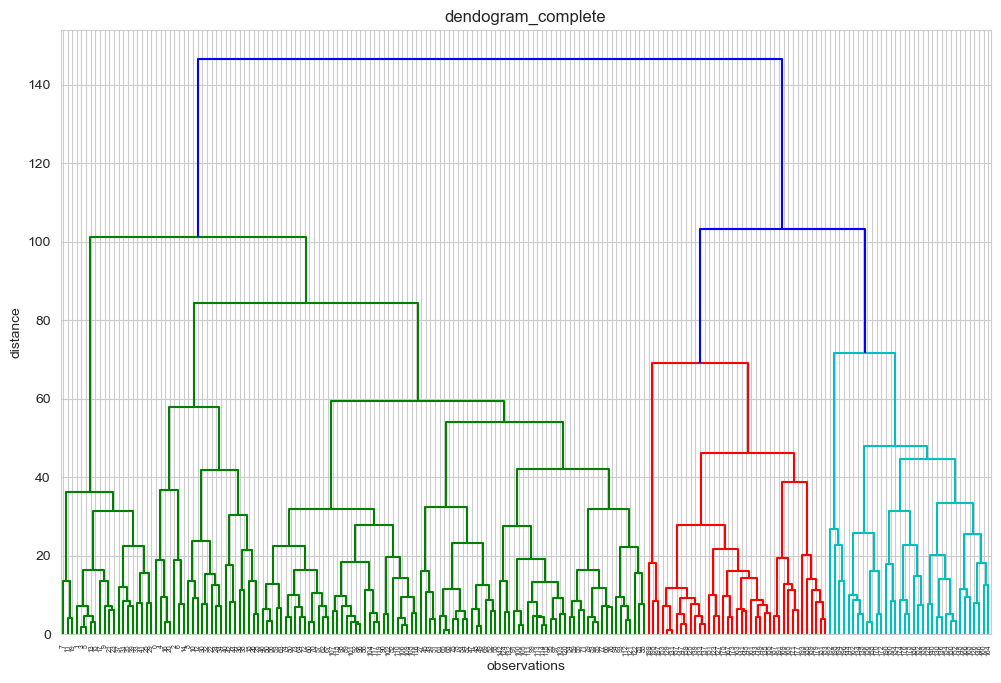

In [135]:
plt.figure(figsize=(12,8))
dendrogram(hc_complete)
plt.title("dendogram_complete")
plt.xlabel("observations")
plt.ylabel("distance")
plt.show()

In [136]:
hc_ward = linkage(df3, "ward")

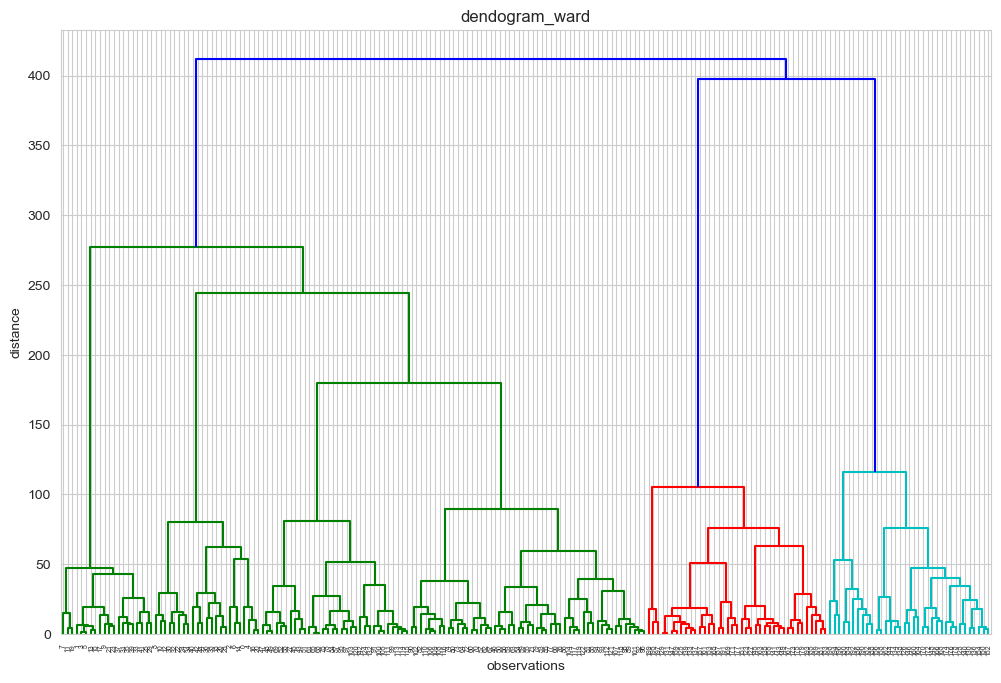

In [137]:
plt.figure(figsize=(12,8))
dendrogram(hc_ward)
plt.title("dendogram_ward")
plt.xlabel("observations")
plt.ylabel("distance")
plt.show()

#### ii. *Apply Agglomerative Clustering*

In [122]:
from sklearn.cluster import AgglomerativeClustering

In [138]:
model = AgglomerativeClustering(n_clusters=5).fit(df3)

In [139]:
labels = model.labels_

In [140]:
df3["clusters"] = labels

In [141]:
df3.head()

,Age,income,Score,Gender_Male,clusters
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4


#### iii. *Visualizing and Labeling All the Clusters* 

Text(0, 0.5, 'score')

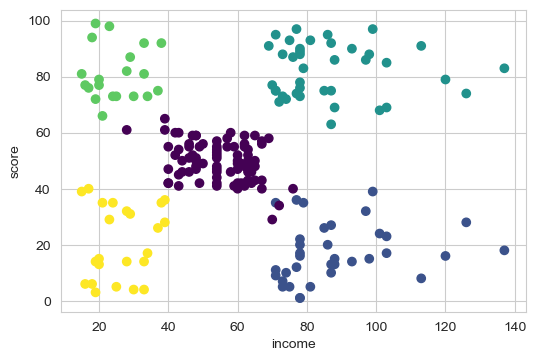

In [151]:
plt.scatter(df3.iloc[:,1], df3.iloc[:,2], c=labels, cmap="viridis")
plt.xlabel("income")
plt.ylabel("score")

In [148]:
from sklearn.metrics import silhouette_samples, silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(df3, model.labels_)}')

Silhouette Score(n=5): 0.44127606330887553
